In [3]:
import matplotlib.pyplot as plt # Mengimpor modul pyplot dari matplotlib
%matplotlib inline

# Mengimpor library matplotlib untuk menampilkan gambar dan grafik secara interaktif di notebook
from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np # Mengimpor modul NumPy

Shape citra 1 :  (312, 250)
Shape citra 1 :  (256, 256)


Text(0.5, 1.0, 'Citra 2')

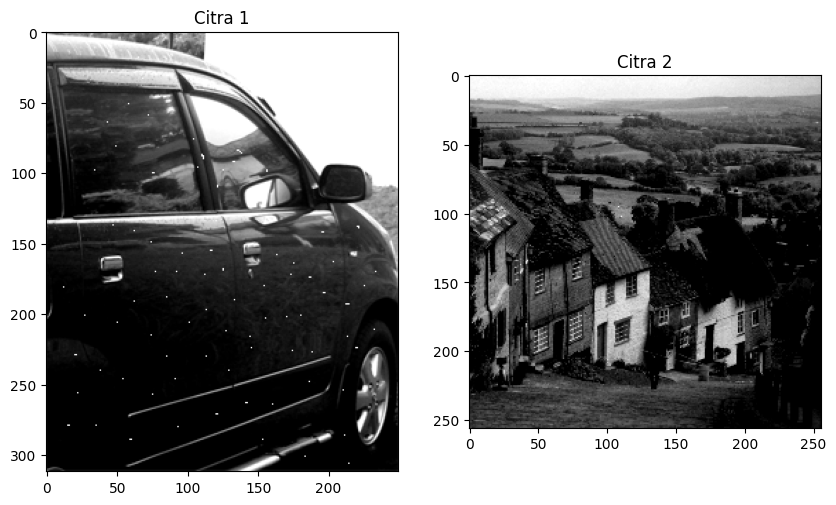

In [4]:
# Membaca citra
citra1 = imread(fname="mobil.tif")   
citra2 = imread(fname="goldhill.tif")  

# Menampilkan dimensi citra
print('Shape citra 1 : ', citra1.shape)  
print('Shape citra 1 : ', citra2.shape) 

fig, axes = plt.subplots(1, 2, figsize=(10, 10))  # Membuat figure
ax = axes.ravel()  # Meratakan array axes menjadi satu dimensi

ax[0].imshow(citra1, cmap='gray')  # Menampilkan citra1 
ax[0].set_title("Citra 1")  # Mengatur judul

ax[1].imshow(citra2, cmap='gray')  # Menampilkan citra2 
ax[1].set_title("Citra 2")  # Mengatur judul 


In [5]:
#%proses filter median untuk citra mobil
#for baris=2 : tinggiA-1
#    for kolom=2 : lebarA-1
#        dataA = [inputMobil(baris-1, kolom-1) inputMobil(baris-1, kolom) inputMobil(baris-1, kolom+1)  ...
#              inputMobil(baris, kolom-1) inputMobil(baris, kolom) inputMobil(baris, kolom+1)  ...
#              inputMobil(baris+1, kolom-1) inputMobil(baris+1, kolom) inputMobil(baris+1, kolom+1)];
#        % Urutkan
#        for i=1 : 8
#            for j=i+1 : 9
#                if dataA(i) > dataA(j)
#                    tmpA = dataA(i);
#                    dataA(i) = dataA(j);
#                    dataA(j) = tmpA;
#                end
#            end
#        end      
#        % Ambil nilai median
#        outputMobil(baris, kolom) = dataA(5);
#    end
#end

In [6]:
copyCitra1 = citra1.copy()  # Membuat salinan dari citra1 
copyCitra2 = citra2.copy()  # Membuat salinan dari citra2 

m1,n1 = copyCitra1.shape  # Mendapatkan dimensi baris dan kolom 
output1 = np.empty([m1, n1])  # Membuat array kosong 

m2,n2 = copyCitra2.shape  # Mendapatkan dimensi baris dan kolom 
output2 = np.empty([m2, n2])  # Membuat array kosong 

print('Shape copy citra 1 : ', copyCitra1.shape)  # Menampilkan dimensi copyCitra1.
print('Shape output citra 1 : ', output1.shape)  # Menampilkan dimensi output1.

print('m1 : ',m1)  # Menampilkan nilai m1.
print('n1 : ',n1)  # Menampilkan nilai n1.
print()

print('Shape copy citra 2 : ', copyCitra2.shape)  # Menampilkan dimensi copyCitra2.
print('Shape output citra 3 : ', output2.shape)  # Menampilkan dimensi output2.
print('m2 : ',m2)  # Menampilkan nilai m2.
print('n2 : ',n2)  # Menampilkan nilai n2.
print()


Shape copy citra 1 :  (312, 250)
Shape output citra 1 :  (312, 250)
m1 :  312
n1 :  250

Shape copy citra 2 :  (256, 256)
Shape output citra 3 :  (256, 256)
m2 :  256
n2 :  256



In [7]:
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris  # Menyimpan nilai baris 
        b1 = kolom  # Menyimpan nilai kolom 
        
        dataA = [copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1], \
              copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1], \
              copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]]  # Membuat list dataA yang berisi elemen-elemen sekitar pada copyCitra1
        
        # Urutkan dataA secara ascending
        for i in range(1, 8):
            for j in range(i, 9):
                if dataA[i] > dataA[j]:  # Jika nilai dataA[i] lebih besar dari dataA[j], lakukan pertukaran
                    tmpA = dataA[i]
                    dataA[i] = dataA[j]
                    dataA[j] = tmpA
        
        output1[a1, b1] = dataA[5]  # Simpan nilai median dari dataA pada output1


In [8]:
for baris in range(0, m2-1):
    for kolom in range(0, n2-1):
        a1 = baris  # Menyimpan nilai baris saat ini ke variabel a1.
        b1 = kolom  # Menyimpan nilai kolom saat ini ke variabel b1
        
        dataA = [copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1], \
              copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1], \
              copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]]  # Membuat list dataA yang berisi elemen-elemen sekitar pada copyCitra2
        
        # Urutkan dataA secara ascending
        for i in range(1, 8):
            for j in range(i, 9):
                if dataA[i] > dataA[j]:  # Jika nilai dataA[i] lebih besar dari dataA[j], lakukan pertukaran
                    tmpA = dataA[i]
                    dataA[i] = dataA[j]
                    dataA[j] = tmpA
        
        output2[a1, b1] = dataA[5]  # Simpan nilai median dari dataA pada output2


Text(0.5, 1.0, 'Output Citra 2')

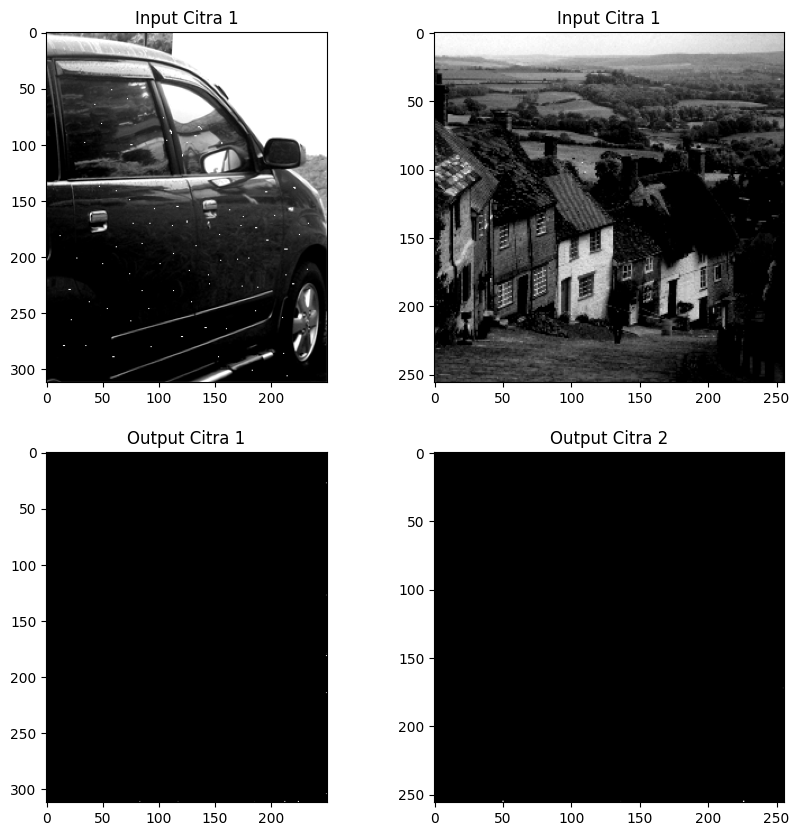

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Membuat subplot 
ax = axes.ravel()  # Meratakan array 

ax[0].imshow(citra1, cmap='gray')  # Menampilkan citra1 
ax[0].set_title("Input Citra 1")  # Memberikan judul 

ax[1].imshow(citra2, cmap='gray')  # Menampilkan citra2
ax[1].set_title("Input Citra 2")  # Memberikan judul 

ax[2].imshow(output1, cmap='gray')  # Menampilkan output1 
ax[2].set_title("Output Citra 1")  # Memberikan judul 

ax[3].imshow(output2, cmap='gray')  # Menampilkan output2 
ax[3].set_title("Output Citra 2")  # Memberikan judul 
